In [9]:
import pandas as pd
from scipy import *
from pylab import *

In [10]:
df1 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable1.dta')
df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


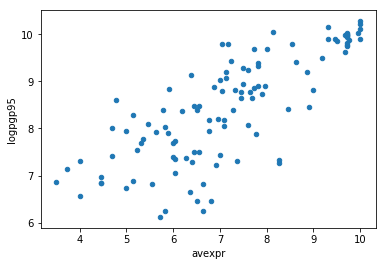

In [11]:
df1.plot(x='avexpr',y='logpgp95',kind='scatter')
show()

In [12]:
df1_subset=df1.dropna(subset=['avexpr','logpgp95'])

In [13]:
type(df1_subset)

pandas.core.frame.DataFrame

In [14]:
df1_subset = df1_subset[df1_subset['baseco'] == 1];type(df1_subset)

pandas.core.frame.DataFrame

In [15]:
X = df1_subset['avexpr'];
y = df1_subset['logpgp95'];


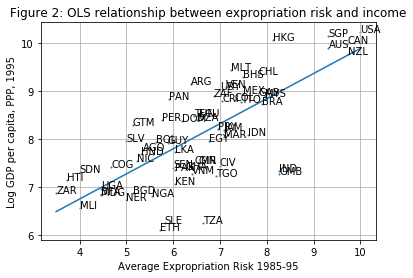

In [16]:
labels = df1_subset['shortnam']
scatter(X,y,s=1)
for i,label in enumerate(labels):
    annotate(label,(X.iloc[i],y.iloc[i]))
plot(unique(X),poly1d(polyfit(X,y,1))(unique(X)))
xlabel('Average Expropriation Risk 1985-95')
ylabel('Log GDP per capita, PPP, 1995')
title('Figure 2: OLS relationship between expropriation risk and income')
grid()
show()

In [24]:
#import statsmodels
#from statsmodels import regression
import statsmodels.api as sm
df1['const']=1
reg1=sm.OLS(endog=df1['logpgp95'],exog=df1[['const','avexpr']],missing='drop')
type(reg1)
res=reg1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Sat, 27 Oct 2018   Prob (F-statistic):           4.16e-24
Time:                        11:13:55   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6261      0.301     15.391      0.000       4.030       5.222
avexpr         0.5319      0.041     13.093      0.000       0.451       0.612
==============================================================================
Omnibus:                        9.251   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.170
Skew:                          -0.680   Prob(JB):                       0.0102
Kurtosis:                       3.362   Cond. No.                         33.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""